In [1]:
# Libraries
from os import listdir
from os.path import isfile, join
from P2PNet.model import create_model, predict, count, draw_points, density_map
import matplotlib.pyplot as plt

In [2]:
# Create model
model, transform= create_model()

number of people: 47

locations:


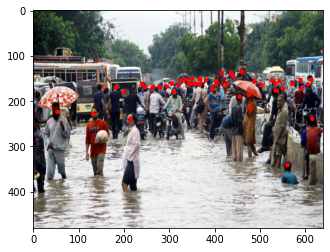

density map:


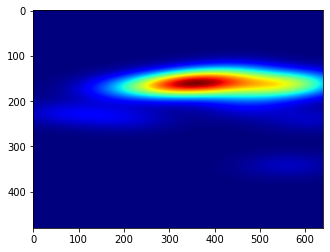

In [3]:
# Predict Number of persons
img_path = 'Dataset/images/002.jpg'
points = predict(img_path, model, transform)
print(f'number of people: {count(points)}')

# Draw predicted locations of heads
print('\nlocations:')
plt.imshow(draw_points(img_path, points))
plt.show()

# Show density map
print('density map:')
plt.imshow(density_map(points), cmap=plt.cm.get_cmap('jet'))
plt.show()

In [ ]:
# Create a list of image paths in Dataset
Dataset_path = 'Dataset/images/'
img_names = listdir(Dataset_path)
img_names.sort()
img_paths = [Dataset_path+img_name for img_name in img_names]

# Predict Number of persons in Dataset
predicted=[]
for img in img_paths:
    points = predict(img, model, transform)
    predicted.append(count(points))

# Store prediction in text file
with open ('predicted.txt','w') as f:
  for i in range(len(predicted)):
    if i < len(predicted) - 1:
      f.write(str(predicted[i])+'\n')
    else: 
      f.write(str(predicted[i]))

In [4]:
# Read predicted labels and real labels
with open('predicted.txt') as f:
    predicted_numbers = [int(i) for i in f.read().split('\n')]

with open('Dataset/Labels.txt') as f:
    labels = [int(i) for i in f.read().split('\n')]

# Calculate MAE
error=0
for i in range(0,200):
    error += abs(predicted_numbers[i]-labels[i])/200

print(f'MAE: {error}')

# Calculate MSE
error=0
for i in range(0,200):
    error += ((predicted_numbers[i]-labels[i])**2)/200

print(f'MSE: {error}')

MAE: 12.694999999999986
MSE: 432.79499999999985
